In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
regression_results = pd.read_csv( "../results/regr_results_fingerprints_plus_feat.csv", index_col = 0)
regression_results

,name_short,adduct,matrix,polarity,regressor,observed_value,prediction
0,2-Oxoglutaric acid,+Cl,9AA,negative,Lin_reg,0.000000,8.921198e+14
1,3-Hydroxymethylglutaric acid,+Cl,9AA,negative,Lin_reg,0.000000,9.770028e+17
2,3-Phosphoglyceric acid,+Cl,9AA,negative,Lin_reg,0.000000,-2.075961e+17
3,"4,5-Dihydroorotic acid",+Cl,9AA,negative,Lin_reg,160.795550,-5.418741e+18
4,4-Hydroxyproline,+Cl,9AA,negative,Lin_reg,46.253326,4.089315e+18
...,...,...,...,...,...,...,...
212935,Urocanic acid,[M]-,pNA,positive,GaussianProcess,0.000000,3.578398e+03
212936,Valine,[M]-,pNA,positive,GaussianProcess,0.000000,3.793842e+03
212937,Xanthine,[M]-,pNA,positive,GaussianProcess,0.000000,3.498633e+03
212938,alpha-tocopherol,[M]-,pNA,positive,GaussianProcess,0.000000,3.863232e+03


In [50]:
import scipy.stats
from sklearn.metrics import mean_squared_error

# compute Spearman's correlation and mean squared error for
regression_metrics = pd.DataFrame(columns = ['matrix', 'polarity', 'regressor', "Spearman's R", 'S pval', 
                                             "Pearson's R", 'P pval', 'RMSE', 'RMSE/std', 'non zero int'])
counter = 0
for (matrix, polarity, regressor), rows in regression_results.groupby(['matrix', 'polarity', 'regressor']):
    spearman = scipy.stats.spearmanr(rows.observed_value, rows.prediction)
    pearson = scipy.stats.pearsonr(rows.observed_value, rows.prediction)
    mse = mean_squared_error(rows.observed_value, rows.prediction, squared = False)
    regression_metrics.loc[counter] = [matrix, polarity, regressor, spearman[0], spearman[1], 
                                       pearson[0], pearson[1],
                                       mse, mse/rows.observed_value.std(), rows[rows.observed_value!=0].shape[0]]
    # print(matrix, polarity, regressor)
    counter += 1

In [48]:
# select best regressor for each matrix/polarity combination
best_RMSE = regression_metrics.loc[regression_metrics.groupby(['matrix', 'polarity'])["RMSE"].idxmin()].sort_values("RMSE/std", ascending=False)
best_spear = regression_metrics.loc[regression_metrics.groupby(['matrix', 'polarity'])["Spearman's R"].idxmax()].sort_values("Spearman's R", ascending=False)
best_pears = regression_metrics.loc[regression_metrics.groupby(['matrix', 'polarity'])["Pearson's R"].idxmax()].sort_values("Pearson's R", ascending=False)

best_spear
# best_RMSE


,matrix,polarity,regressor,Spearman's R,S pval,Pearson's R,P pval,RMSE,RMSE/std,non zero int
117,DHB,positive,DecisionTree,0.658457,6.048108e-148,0.298684,8.369388e-26,46011.262497,1.245818,382
70,ClCCA,positive,SVR_poly,0.610643,8.183952e-122,0.071800,1.350706e-02,15038.816426,1.005024,365
34,CHCA,positive,SVR_poly,0.609528,2.948002e-121,0.114786,7.591296e-05,38226.148903,1.011090,355
106,DHAP,positive,SVR_poly,0.568760,2.442136e-102,0.218980,2.607602e-14,6910.844235,1.007120,275
18,CHCA,negative,DecisionTree,0.537049,2.356124e-89,0.218096,3.327381e-14,7600.472226,1.261042,79
88,DAN,positive,SVR_poly,0.528120,6.086724e-86,0.189038,5.592705e-11,10838.695905,1.007435,209
178,pNA,positive,SVR_poly,0.526311,2.907314e-85,0.185282,1.347835e-10,28240.443851,1.006450,274
5,9AA,negative,RandomForest,0.522171,1.004862e-83,0.551727,3.431209e-95,59196.248062,0.855367,167
79,DAN,negative,SVR_poly,0.499646,1.024421e-75,0.332267,6.926076e-32,8358.736437,1.009802,155
151,NOR,negative,SVR_poly,0.497319,6.370553e-75,0.345585,1.614219e-34,21524.597964,1.009613,149


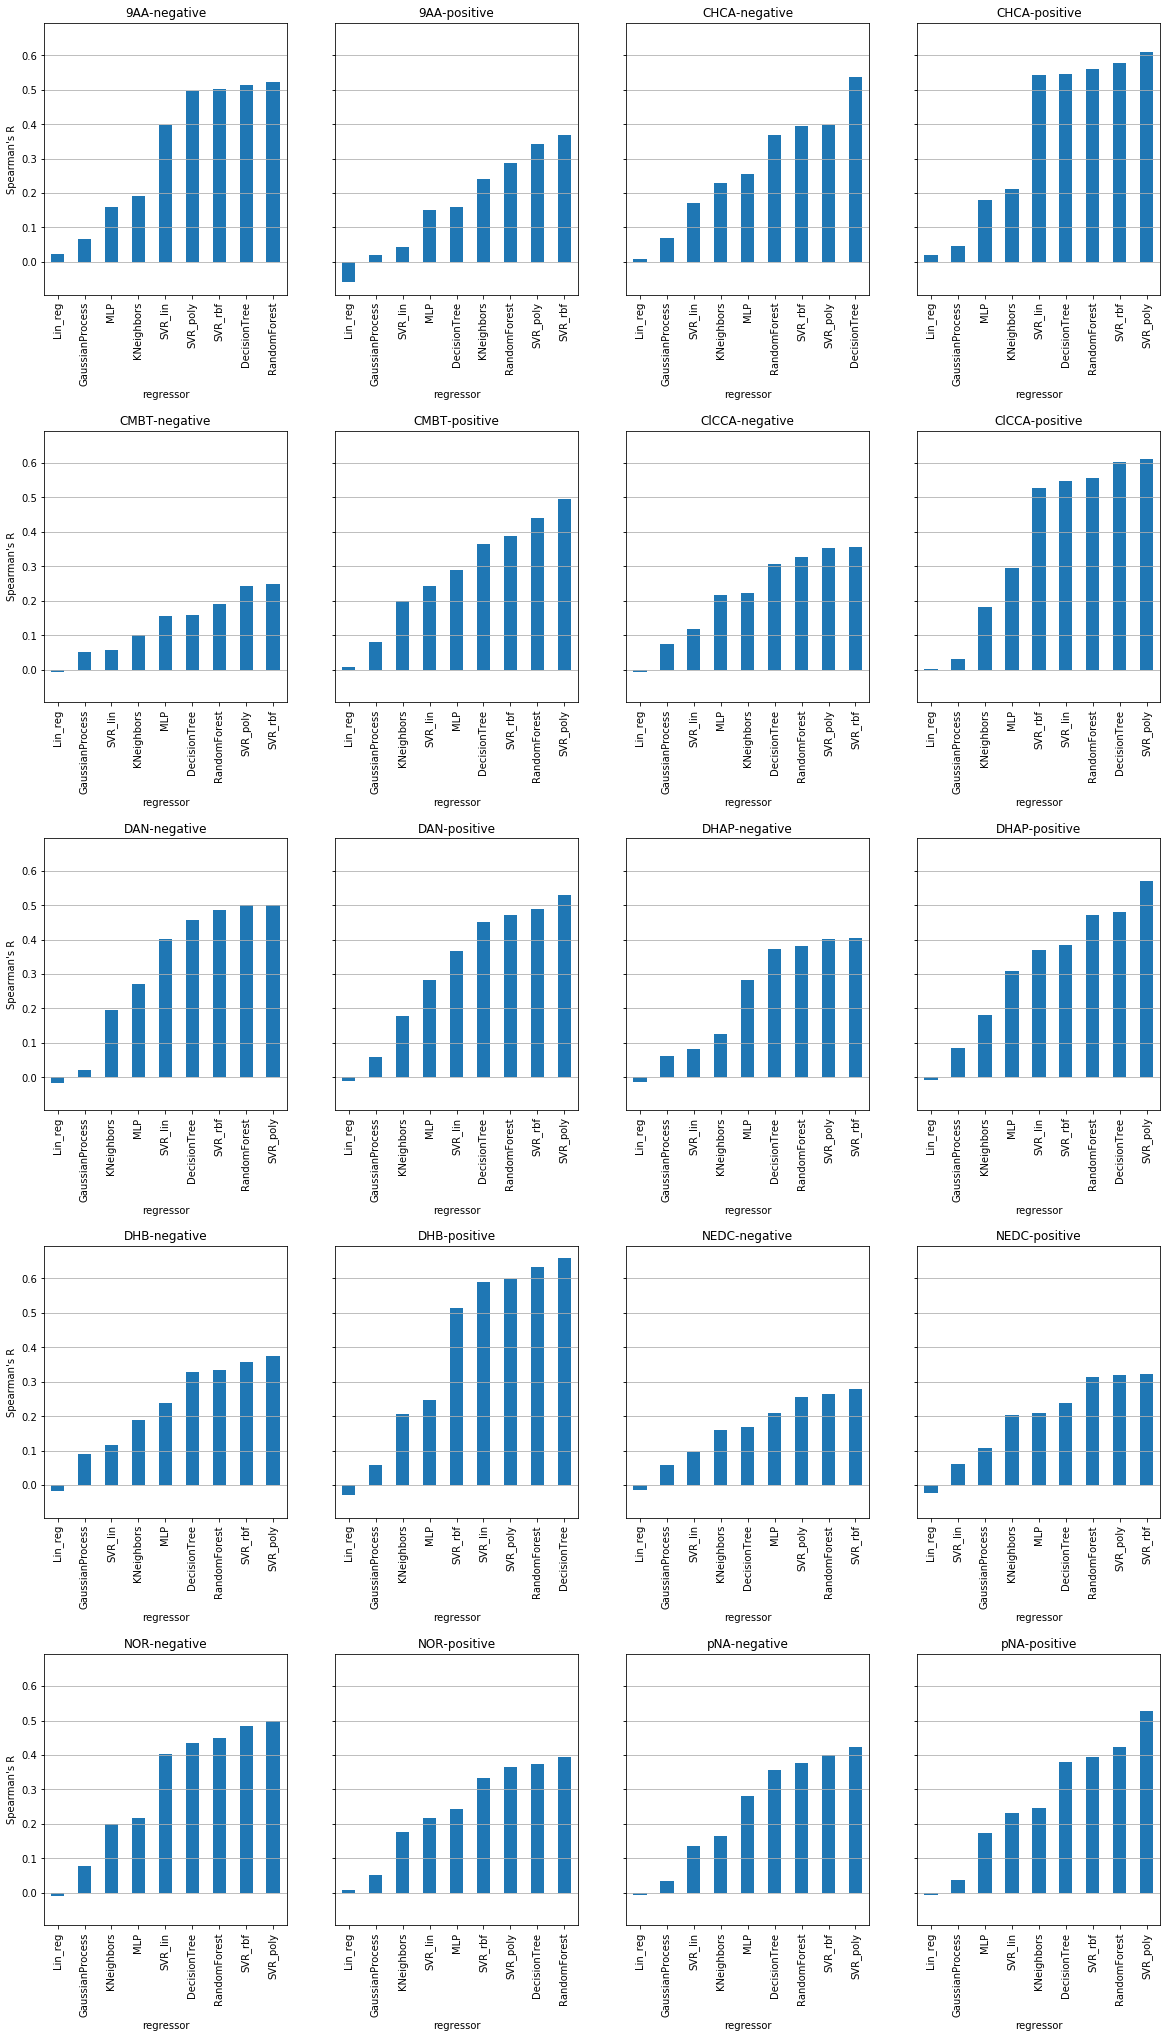

In [59]:
fig, axes = plt.subplots(ncols=4,nrows=5, sharey=True, figsize= (20, 35))
ax_list = axes.flat

metric = "Spearman's R"
#metric = "RMSE"

i = 0
for (matrix, polarity), rows in regression_metrics.groupby(['matrix', 'polarity']):
    rows = rows.set_index('regressor', drop = True).sort_values( by = metric)
    rows[metric].plot.bar(ax = ax_list[i], title=f"{matrix}-{polarity}")
    ax_list[i].set_ylabel(metric)
    ax_list[i].grid(axis='y')
    i+=1

plt.subplots_adjust(hspace=0.5)
    
plt.show()

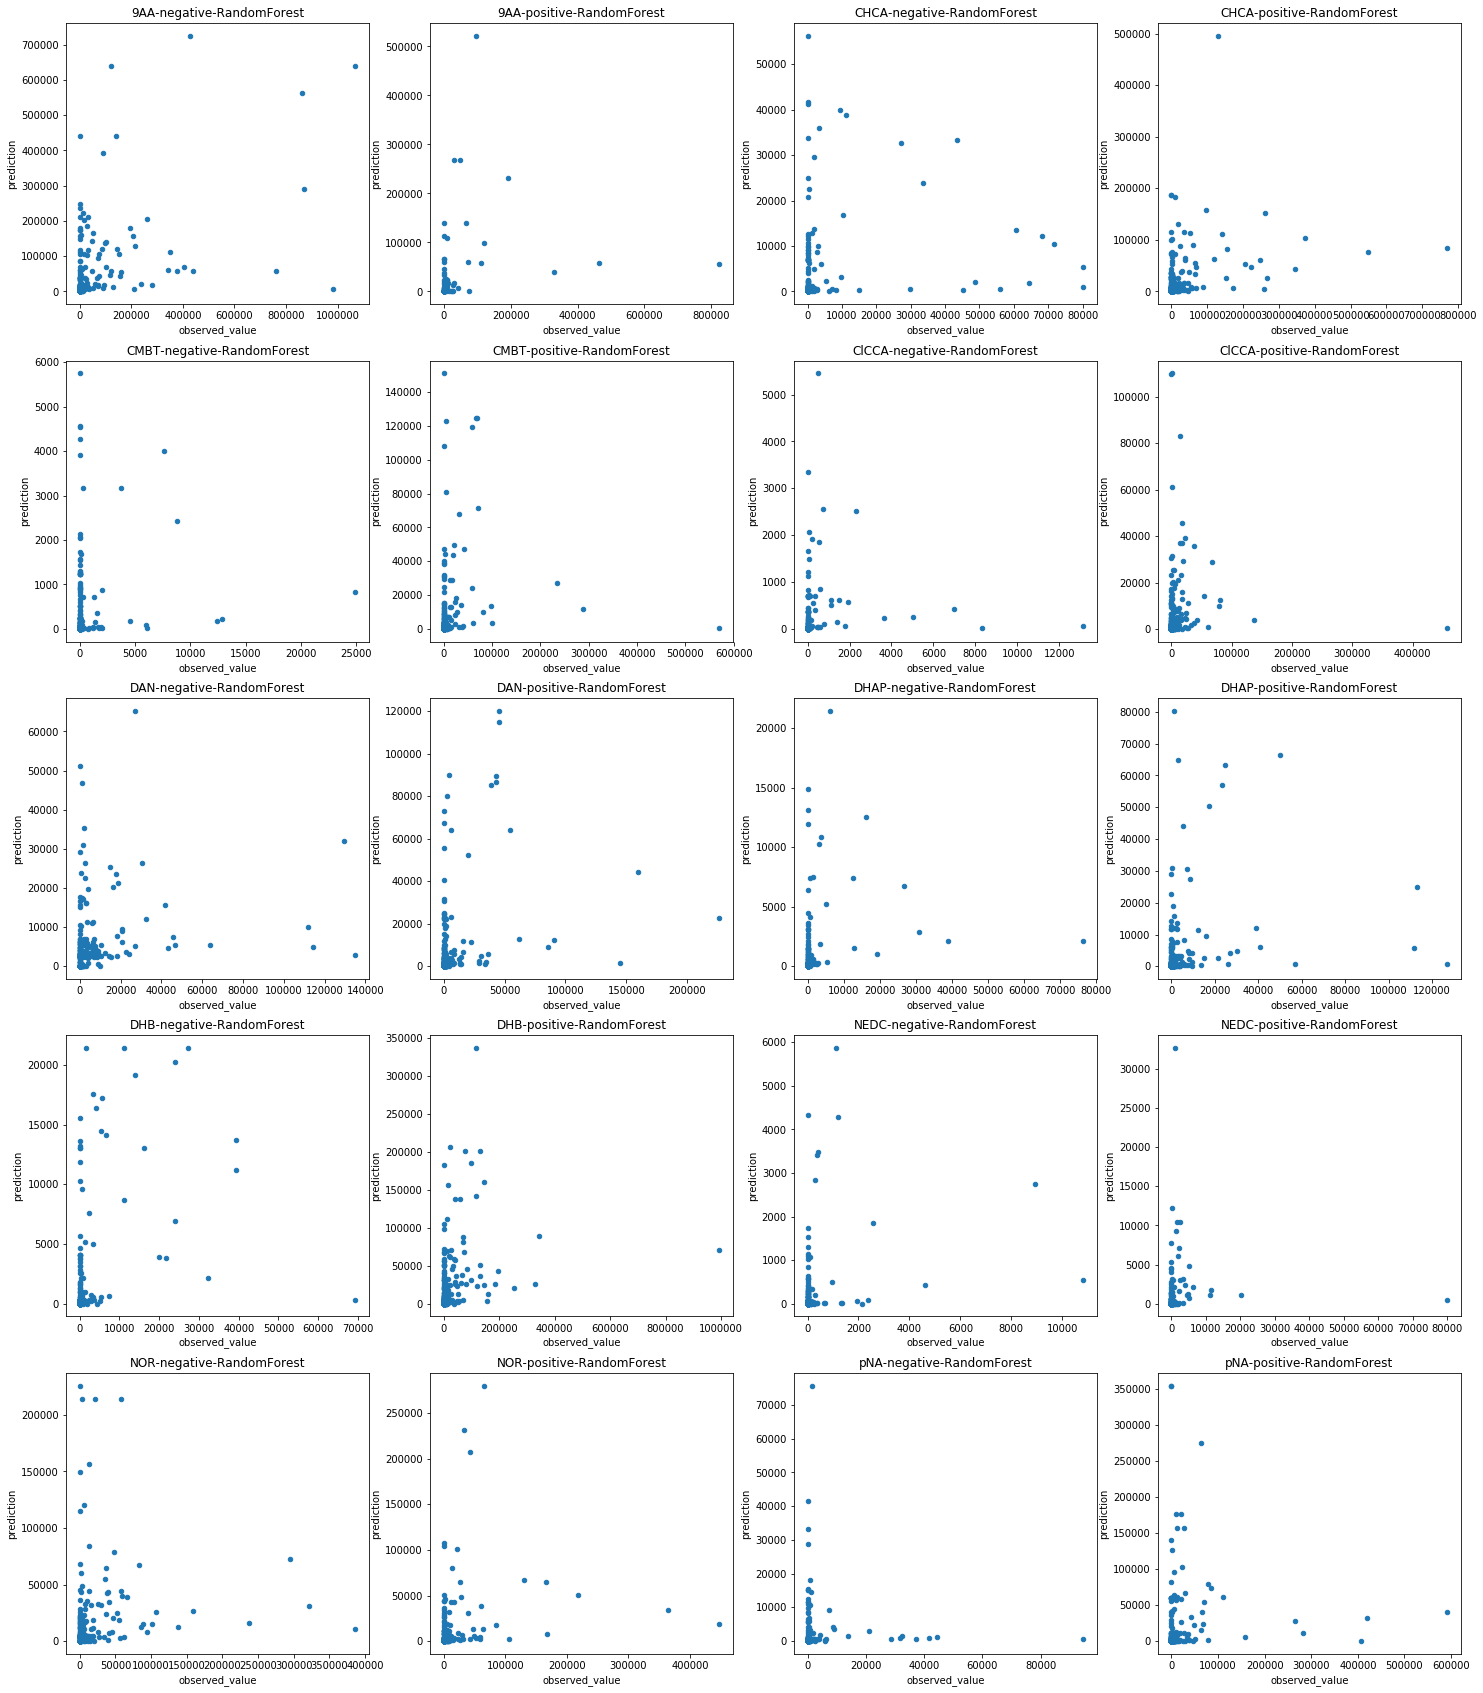

In [60]:
fig, axes = plt.subplots(ncols=4,nrows=5, figsize= (25, 30))
ax_list = axes.flat

regressor = "RandomForest"

i = 0
for (matrix, polarity), rows in regression_results.groupby(['matrix', 'polarity']):
    rows[rows.regressor == regressor].plot.scatter(x = 'observed_value', y= 'prediction',
                                                   ax = ax_list[i], title=f"{matrix}-{polarity}-{regressor}")
    i+=1
    
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()